# Exercise 5: Observation model


## 5.1 Implement model for perceiving landmarks

Consider a robot that operates in an environment populated by **range-only** sensors such as _beacons_.
These sensors transmit a signal that allows for obtaining noisy measurements of their distance from a receiver mounted on the robot.

The function `landmark_observation_model` realizes the observation model for perceiving landmarks with a range sensor. It takes as input:
 
- the observed noisy range $z$
- the standard deviation of the measurement $\sigma_z$ (zero-mean Gaussian noise)
- the position of the robot in the map $x$
- the position of the beacon transmitting beacon in the map $m$

The output of this function is the probability $p(z | x, m)$ that the measurement $z$ was obtained at position $x$.

Implement the `landmark_observation_model` function and verify that it is correct for some test input. **[2.0]**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ex5

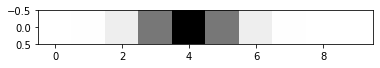

In [17]:
grid = np.zeros((1,10))
z = 4
std = 1
m = [0,0]

for i in range(grid.shape[1]):
    grid[0,i] = ex5.landmark_obs_model(z,std,[0,i],m)
ex5.plot_gridmap(grid)

---

## 5.2 Compute likelihood of measurement in the environment

The robot operates in an environment that is represetend by a 20x20 grid map and contains a beacon at position $m_1 = [0,0]$ (top-left corner). 

The robot obtains a range measurement of the beacon $z_1 = 10$ and the sensor noise is $\sigma_{z1} = 1$.

Compute the `landmark_observation_model` at each cell of the environment and plot the likelihood of the observation over the environment. **[1.0]** 

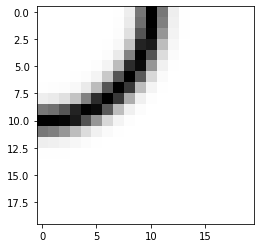

In [5]:
map = np.zeros((20,20))
z   = 10
m   = [0,0]
std = 1

for i in range(map.shape[0]):
    for j in range(map.shape[1]):
        map[i,j] = ex5.landmark_obs_model(z,std,[i,j],m)

ex5.plot_gridmap(map)

---

## 5.3 Multiple landmarks

Assume that we install two **additional** beacons in our environment:

- $m_2 = [0, 10]$
- $m_3 = [10, 0]$

from which we obtain the following observations:

- $z_2 = 5$ with $\sigma_{z2} = 3$
- $z_3 = 9$ with $\sigma_{z3} = 2$

Compute the `landmark_observation_model` at each cell of the environment considering the measurements from **all** beacons and plot the **joint** likelihood of the observations over the environment. **[2.0]** 

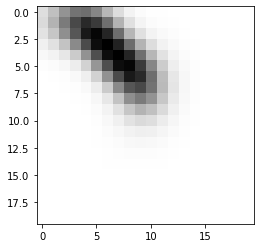

In [8]:
grid_map = np.zeros((20,20))
z   = [5,9]
m   = [[0,10],[10,0]]
std = [3,2]

for i in range(grid_map.shape[0]):
    for j in range(grid_map.shape[1]):

        prob_b1 = ex5.landmark_obs_model(z[0],std[0],[i,j],m[0])
        prob_b2 = ex5.landmark_obs_model(z[1],std[1],[i,j],m[1])

        grid_map[i,j]  = prob_b1 * prob_b2
ex5.plot_gridmap(grid_map)